# Data Preprocessing for Supply Chain Time Series Forecasting

Notebook n√†y d√πng ƒë·ªÉ kh√°m ph√° v√† ti·ªÅn x·ª≠ l√Ω d·ªØ li·ªáu Supply Chain cho b√†i to√°n d·ª± ƒëo√°n chu·ªói th·ªùi gian.

In [1]:
# Import c√°c th∆∞ vi·ªán c·∫ßn thi·∫øt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# C·∫•u h√¨nh hi·ªÉn th·ªã
plt.style.use('default')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("ƒê√£ import th√†nh c√¥ng c√°c th∆∞ vi·ªán c·∫ßn thi·∫øt!")

ƒê√£ import th√†nh c√¥ng c√°c th∆∞ vi·ªán c·∫ßn thi·∫øt!


In [2]:
# ƒê·ªçc d·ªØ li·ªáu t·ª´ file CSV
data_path = '/home/u1/Desktop/Gra_pr/QT_v2/QTransformer/dataset/DataCoSupplyChain_Synchronized.csv'
df = pd.read_csv(data_path)

# Hi·ªÉn th·ªã th√¥ng tin c∆° b·∫£n v·ªÅ dataset
print("=== TH√îNG TIN C∆† B·∫¢N V·ªÄ DATASET ===")
print(f"K√≠ch th∆∞·ªõc dataset: {df.shape}")
print(f"S·ªë d√≤ng: {df.shape[0]:,}")
print(f"S·ªë c·ªôt: {df.shape[1]}")
print(f"Dung l∆∞·ª£ng b·ªô nh·ªõ: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print("\n=== C·∫§U TR√öC D·ªÆ LI·ªÜU ===")
print(df.info())

=== TH√îNG TIN C∆† B·∫¢N V·ªÄ DATASET ===
K√≠ch th∆∞·ªõc dataset: (147041, 54)
S·ªë d√≤ng: 147,041
S·ªë c·ªôt: 54
Dung l∆∞·ª£ng b·ªô nh·ªõ: 282.00 MB

=== C·∫§U TR√öC D·ªÆ LI·ªÜU ===
Dung l∆∞·ª£ng b·ªô nh·ªõ: 282.00 MB

=== C·∫§U TR√öC D·ªÆ LI·ªÜU ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147041 entries, 0 to 147040
Data columns (total 54 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           147041 non-null  object 
 1   Days for shipping (real)       147041 non-null  int64  
 2   Days for shipment (scheduled)  147041 non-null  int64  
 3   Benefit per order              147041 non-null  float64
 4   Sales per customer             147041 non-null  float64
 5   Delivery Status                147041 non-null  object 
 6   Late_delivery_risk             147041 non-null  int64  
 7   Category Id                    147041 non-null  int64  
 8   Category Name         

In [3]:
# Hi·ªÉn th·ªã t√™n c√°c c·ªôt
print("=== DANH S√ÅCH C√ÅC C·ªòT ===")
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")

print(f"\nT·ªïng c·ªông: {len(df.columns)} c·ªôt")

# Hi·ªÉn th·ªã v√†i d√≤ng ƒë·∫ßu ti√™n
print("\n=== M·∫™U D·ªÆ LI·ªÜU ƒê·∫¶U TI√äN ===")
df.head()

=== DANH S√ÅCH C√ÅC C·ªòT ===
 1. Type
 2. Days for shipping (real)
 3. Days for shipment (scheduled)
 4. Benefit per order
 5. Sales per customer
 6. Delivery Status
 7. Late_delivery_risk
 8. Category Id
 9. Category Name
10. Customer City
11. Customer Country
12. Customer Email
13. Customer Fname
14. Customer Id
15. Customer Lname
16. Customer Password
17. Customer Segment
18. Customer State
19. Customer Street
20. Customer Zipcode
21. Department Id
22. Department Name
23. Latitude
24. Longitude
25. Market
26. Order City
27. Order Country
28. Order Customer Id
29. order date (DateOrders)
30. Order Id
31. Order Item Cardprod Id
32. Order Item Discount
33. Order Item Discount Rate
34. Order Item Id
35. Order Item Product Price
36. Order Item Profit Ratio
37. Order Item Quantity
38. Sales
39. Order Item Total
40. Order Profit Per Order
41. Order Region
42. Order State
43. Order Status
44. Order Zipcode
45. Product Card Id
46. Product Category Id
47. Product Description
48. Product Imag

Type  Days for shipping (real)  Days for shipment (scheduled)  \
0    DEBIT                         3                              4   
1  PAYMENT                         5                              2   
2  PAYMENT                         6                              2   
3  PAYMENT                         6                              2   
4  PAYMENT                         2                              2   

   Benefit per order  Sales per customer   Delivery Status  \
0          91.250000          314.640015  Advance shipping   
1         -30.750000          115.180000     Late delivery   
2          33.599998           96.000000     Late delivery   
3           6.150000           82.000000     Late delivery   
4          22.410000           74.680000  Shipping on time   

   Late_delivery_risk  Category Id    Category Name Customer City  \
0                   0           73   Sporting Goods        Caguas   
1                   1           17           Cleats       Bayamon   
2                   1           24  Women's Apparel        Caguas   
3                   1           24  Women's Apparel        Caguas   
4                   0           13      Electronics        Caguas   

  Customer Country Customer Email Customer Fname  Customer Id Customer Lname  \
0      Puerto Rico      XXXXXXXXX          Cally        20755       Holloway   
1      Puerto Rico      XXXXXXXXX           Mary         9083          Frank   
2      Puerto Rico      XXXXXXXXX      Elizabeth          639        Pittman   
3      Puerto Rico      XXXXXXXXX           Mary         8011           Hill   
4      Puerto Rico      XXXXXXXXX           Mary         3296          Smith   

  Customer Password Customer Segment Customer State  \
0         XXXXXXXXX         Consumer             PR   
1         XXXXXXXXX      Home Office             PR   
2         XXXXXXXXX      Home Office             PR   
3         XXXXXXXXX      Home Office             PR   
4         XXXXXXXXX      Home Office             PR   

               Customer Street  Customer Zipcode  Department Id  \
0     5365 Noble Nectar Island             725.0              2   
1             75 Sunny Grounds             957.0              4   
2  7573 Golden Treasure Centre             725.0              5   
3        6179 Noble Panda Moor             725.0              5   
4        8205 Silver Grove Row             725.0              3   

  Department Name   Latitude  Longitude Market     Order City   Order Country  \
0         Fitness  18.251453 -66.037056   USCA         Bekasi       Indonesia   
1         Apparel  18.380119 -66.183128   USCA       Mirzapur           India   
2            Golf  18.025368 -66.613037   USCA  Murray Bridge       Australia   
3            Golf  18.255713 -66.370506   USCA         Raipur           India   
4        Footwear  18.234663 -66.370598   USCA          Pasco  Estados Unidos   

   Order Customer Id order date (DateOrders)  Order Id  \
0              20755        01/31/2018 00:10     77202   
1               9083        07/31/2017 00:17     28744   
2                639        09/04/2017 00:03     31115   
3               8011        03/31/2017 00:06     20365   
4               3296        11/16/2017 00:08     36146   

   Order Item Cardprod Id  Order Item Discount  Order Item Discount Rate  \
0                    1360                13.11                      0.04   
1                     365                 4.80                      0.04   
2                     502                 4.00                      0.04   
3                     502                18.00                      0.18   
4                     278                15.30                      0.17   

   Order Item Id  Order Item Product Price  Order Item Profit Ratio  \
0         180517                327.750000                     0.29   
1          71956                 59.990002                    -0.27   
2          77757                 50.000000                     0.35   

In [4]:
# T√¨m v√† ph√¢n t√≠ch c√°c c·ªôt li√™n quan ƒë·∫øn th·ªùi gian
print("=== PH√ÇN T√çCH C√ÅC C·ªòT TH·ªúI GIAN ===")

# T√¨m c√°c c·ªôt c√≥ th·ªÉ ch·ª©a th√¥ng tin th·ªùi gian
time_related_cols = []
for col in df.columns:
    if any(keyword in col.lower() for keyword in ['date', 'time', 'day', 'month', 'year', 'order']):
        time_related_cols.append(col)

print("C√°c c·ªôt c√≥ th·ªÉ ch·ª©a th√¥ng tin th·ªùi gian:")
for col in time_related_cols:
    print(f"- {col}")
    print(f"  Ki·ªÉu d·ªØ li·ªáu: {df[col].dtype}")
    print(f"  S·ªë gi√° tr·ªã duy nh·∫•t: {df[col].nunique()}")
    print(f"  M·∫´u gi√° tr·ªã: {df[col].dropna().head(3).tolist()}")
    print()

# Ki·ªÉm tra c√°c c·ªôt kh√°c c√≥ th·ªÉ quan tr·ªçng
print("=== C√ÅC C·ªòT QUAN TR·ªåNG KH√ÅC ===")
important_cols = []
for col in df.columns:
    if any(keyword in col.lower() for keyword in ['quantity', 'sales', 'revenue', 'profit', 'price', 'demand']):
        important_cols.append(col)

for col in important_cols:
    print(f"- {col}: {df[col].dtype}, {df[col].nunique()} gi√° tr·ªã duy nh·∫•t")

=== PH√ÇN T√çCH C√ÅC C·ªòT TH·ªúI GIAN ===
C√°c c·ªôt c√≥ th·ªÉ ch·ª©a th√¥ng tin th·ªùi gian:
- Days for shipping (real)
  Ki·ªÉu d·ªØ li·ªáu: int64
  S·ªë gi√° tr·ªã duy nh·∫•t: 7
  M·∫´u gi√° tr·ªã: [3, 5, 6]

- Days for shipment (scheduled)
  Ki·ªÉu d·ªØ li·ªáu: int64
  S·ªë gi√° tr·ªã duy nh·∫•t: 4
  M·∫´u gi√° tr·ªã: [4, 2, 2]

- Benefit per order
  Ki·ªÉu d·ªØ li·ªáu: float64
  S·ªë gi√° tr·ªã duy nh·∫•t: 18915
  M·∫´u gi√° tr·ªã: [91.25, -30.75, 33.59999847]

- Order City
  Ki·ªÉu d·ªØ li·ªáu: object
  S·ªë gi√° tr·ªã duy nh·∫•t: 2827
  M·∫´u gi√° tr·ªã: ['Bekasi', 'Mirzapur', 'Murray Bridge']

- Order Country
  Ki·ªÉu d·ªØ li·ªáu: object
  S·ªë gi√° tr·ªã duy nh·∫•t: 84
  M·∫´u gi√° tr·ªã: ['Indonesia', 'India', 'Australia']

- Order Customer Id
  Ki·ªÉu d·ªØ li·ªáu: int64
  S·ªë gi√° tr·ªã duy nh·∫•t: 12284
  M·∫´u gi√° tr·ªã: [20755, 9083, 639]

- order date (DateOrders)
  Ki·ªÉu d·ªØ li·ªáu: object
  S·ªë gi√° tr·ªã duy nh·∫•t: 48204
  M·∫´u gi√° tr·ªã: ['01/31/2018 00:10',

In [5]:
# Th·ªëng k√™ m√¥ t·∫£ cho c√°c c·ªôt s·ªë
print("=== TH·ªêNG K√ä M√î T·∫¢ C√ÅC C·ªòT S·ªê ===")
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"T√¨m th·∫•y {len(numeric_cols)} c·ªôt s·ªë:")
for col in numeric_cols:
    print(f"- {col}")

print("\nTh·ªëng k√™ chi ti·∫øt:")
df.describe()

=== TH·ªêNG K√ä M√î T·∫¢ C√ÅC C·ªòT S·ªê ===
T√¨m th·∫•y 29 c·ªôt s·ªë:
- Days for shipping (real)
- Days for shipment (scheduled)
- Benefit per order
- Sales per customer
- Late_delivery_risk
- Category Id
- Customer Id
- Customer Zipcode
- Department Id
- Latitude
- Longitude
- Order Customer Id
- Order Id
- Order Item Cardprod Id
- Order Item Discount
- Order Item Discount Rate
- Order Item Id
- Order Item Product Price
- Order Item Profit Ratio
- Order Item Quantity
- Sales
- Order Item Total
- Order Profit Per Order
- Order Zipcode
- Product Card Id
- Product Category Id
- Product Description
- Product Price
- Product Status

Th·ªëng k√™ chi ti·∫øt:


Days for shipping (real)  Days for shipment (scheduled)  \
count             147041.000000                  147041.000000   
mean                   3.497596                       2.931591   
std                    1.624049                       1.374192   
min                    0.000000                       0.000000   
25%                    2.000000                       2.000000   
50%                    3.000000                       4.000000   
75%                    5.000000                       4.000000   
max                    6.000000                       4.000000   

       Benefit per order  Sales per customer  Late_delivery_risk  \
count      147041.000000       147041.000000       147041.000000   
mean           21.454611          179.323835            0.548262   
std            97.751153          101.657957            0.497667   
min         -1844.979980            7.490000            0.000000   
25%             7.470000          106.589996            0.000000   
50%            31.850000          163.979996            1.000000   
75%            64.000000          245.960007            1.000000   
max           721.599976         1699.989990            1.000000   

         Category Id    Customer Id  Customer Zipcode  Department Id  \
count  147041.000000  147041.000000     147041.000000  147041.000000   
mean       30.125169    6223.841813      35842.584368       5.347379   
std        13.750241    3610.631753      37514.561794       1.481490   
min         2.000000       1.000000        603.000000       2.000000   
25%        18.000000    3119.000000        725.000000       4.000000   
50%        29.000000    6170.000000      19148.000000       5.000000   
75%        45.000000    9358.000000      78130.000000       7.000000   
max        76.000000   20757.000000      99205.000000       9.000000   

            Latitude      Longitude  Order Customer Id       Order Id  \
count  147041.000000  147041.000000      147041.000000  147041.000000   
mean       29.712687     -84.877231        6223.841813   32398.803171   
std         9.811156      21.404860        3610.631753   20799.676604   
min       -33.937553    -158.025986           1.000000       1.000000   
25%        18.265017     -98.302551        3119.000000   14692.000000   
50%        33.144863     -76.773293        6170.000000   29384.000000   
75%        39.278301     -66.370583        9358.000000   54098.000000   
max        48.781933     115.263077       20757.000000   77204.000000   

       Order Item Cardprod Id  Order Item Discount  Order Item Discount Rate  \
count           147041.000000        147041.000000             147041.000000   
mean               660.809876            20.242004                  0.101657   
std                310.840679            19.808489                  0.070408   
min                 19.000000             0.000000                  0.000000   
25%                403.000000             5.600000                  0.040000   
50%                627.000000            14.000000                  0.090000   
75%               1004.000000            29.990000                  0.160000   
max               1363.000000           500.000000                  0.250000   

       Order Item Id  Order Item Product Price  Order Item Profit Ratio  \
count  147041.000000             147041.000000            147041.000000   
mean    80992.515645                134.090504                 0.120296   
std     51992.998597                117.727384                 0.468185   
min         1.000000                  9.990000                -2.750000   
25%     36761.000000                 50.000000                 0.080000   
50%     73521.000000                 59.990002                 0.270000   
75%    135270.000000                199.990005                 0.360000   
max    180519.000000               1999.989990                 0.500000   

       Order Item Quantity          Sales  Order Item Total  \
count        147041.000000  1470

In [6]:
# Ki·ªÉm tra missing values
print("=== KI·ªÇM TRA MISSING VALUES ===")
missing_stats = df.isnull().sum()
missing_percent = (missing_stats / len(df)) * 100

missing_df = pd.DataFrame({
    'Column': missing_stats.index,
    'Missing_Count': missing_stats.values,
    'Missing_Percentage': missing_percent.values
}).sort_values('Missing_Count', ascending=False)

print("C√°c c·ªôt c√≥ missing values:")
print(missing_df[missing_df['Missing_Count'] > 0])

# Ki·ªÉm tra duplicate records
print(f"\n=== KI·ªÇM TRA DUPLICATE RECORDS ===")
duplicates = df.duplicated().sum()
print(f"S·ªë d√≤ng tr√πng l·∫∑p: {duplicates}")
print(f"T·ª∑ l·ªá tr√πng l·∫∑p: {(duplicates/len(df)*100):.2f}%")

# Ki·ªÉm tra unique values cho c√°c c·ªôt categorical
print(f"\n=== PH√ÇN T√çCH C√ÅC C·ªòT CATEGORICAL ===")
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
for col in categorical_cols[:10]:  # Ch·ªâ hi·ªÉn th·ªã 10 c·ªôt ƒë·∫ßu
    unique_count = df[col].nunique()
    print(f"{col}: {unique_count} gi√° tr·ªã duy nh·∫•t")
    if unique_count <= 20:
        print(f"  C√°c gi√° tr·ªã: {df[col].unique()[:10].tolist()}")
    print()

=== KI·ªÇM TRA MISSING VALUES ===
C√°c c·ªôt c√≥ missing values:
                 Column  Missing_Count  Missing_Percentage
46  Product Description         147041          100.000000
43        Order Zipcode         122201           83.106753

=== KI·ªÇM TRA DUPLICATE RECORDS ===
C√°c c·ªôt c√≥ missing values:
                 Column  Missing_Count  Missing_Percentage
46  Product Description         147041          100.000000
43        Order Zipcode         122201           83.106753

=== KI·ªÇM TRA DUPLICATE RECORDS ===
S·ªë d√≤ng tr√πng l·∫∑p: 0
T·ª∑ l·ªá tr√πng l·∫∑p: 0.00%

=== PH√ÇN T√çCH C√ÅC C·ªòT CATEGORICAL ===
Type: 4 gi√° tr·ªã duy nh·∫•t
  C√°c gi√° tr·ªã: ['DEBIT', 'PAYMENT', 'TRANSFER', 'CASH']

Delivery Status: 4 gi√° tr·ªã duy nh·∫•t
  C√°c gi√° tr·ªã: ['Advance shipping', 'Late delivery', 'Shipping on time', 'Shipping canceled']

Category Name: 36 gi√° tr·ªã duy nh·∫•t

Customer City: 562 gi√° tr·ªã duy nh·∫•t

Customer Country: 2 gi√° tr·ªã duy nh·∫•t
  C√°c gi√° tr·ªã

=== T·∫†O BI·ªÇU ƒê·ªí PH√ÇN T√çCH D·ªÆ LI·ªÜU ===


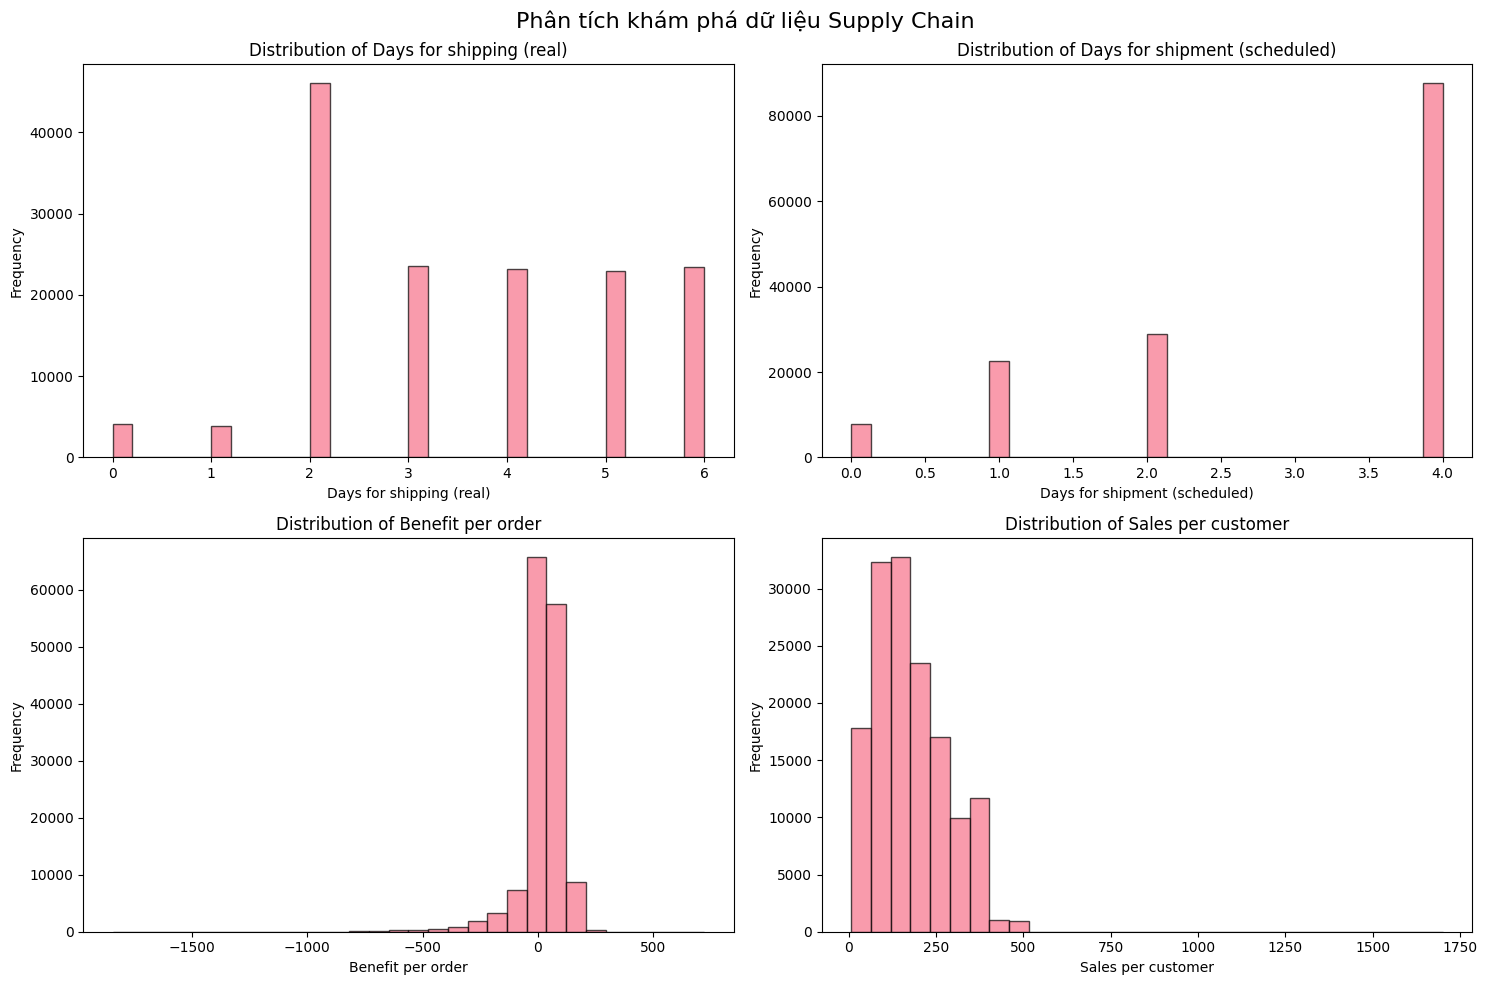

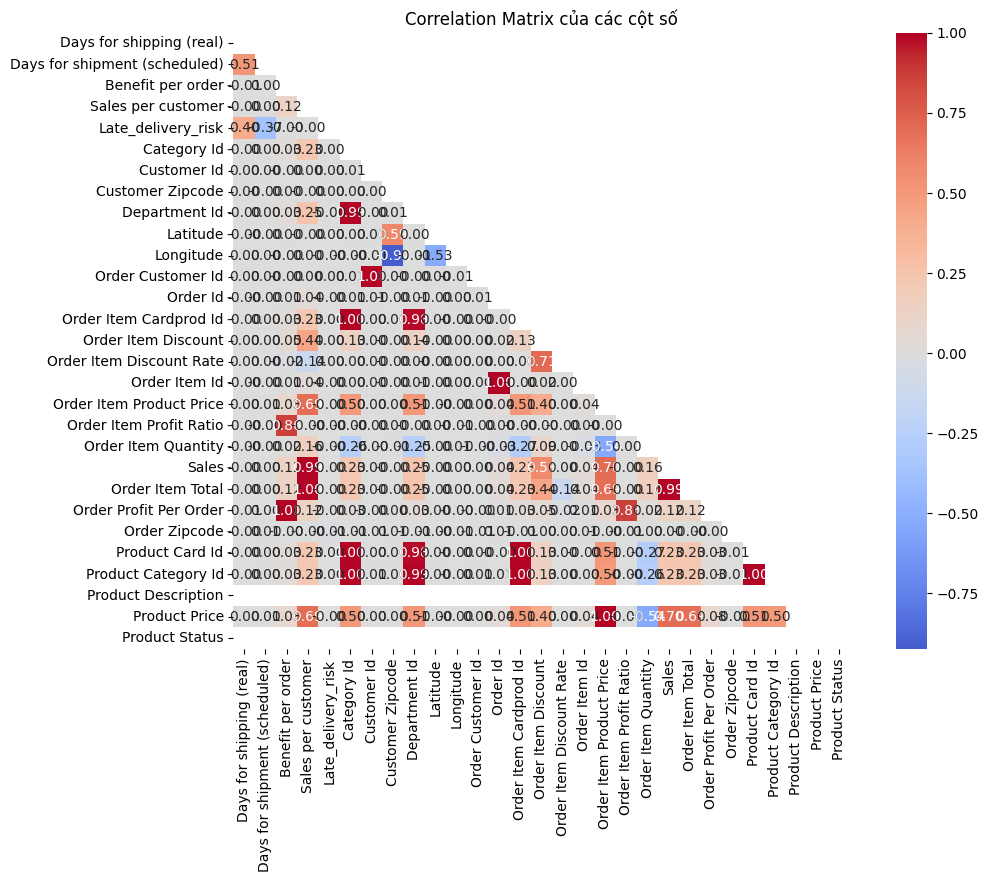

ƒê√£ t·∫°o xong c√°c bi·ªÉu ƒë·ªì ph√¢n t√≠ch!


In [7]:
# T·∫°o visualization ƒë·ªÉ hi·ªÉu d·ªØ li·ªáu
print("=== T·∫†O BI·ªÇU ƒê·ªí PH√ÇN T√çCH D·ªÆ LI·ªÜU ===")

# Thi·∫øt l·∫≠p figure
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Ph√¢n t√≠ch kh√°m ph√° d·ªØ li·ªáu Supply Chain', fontsize=16)

# 1. Distribution c·ªßa c√°c c·ªôt s·ªë quan tr·ªçng
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if len(numeric_cols) > 0:
    # Ch·ªçn m·ªôt v√†i c·ªôt s·ªë ƒë·∫ßu ti√™n ƒë·ªÉ v·∫Ω histogram
    for i, col in enumerate(numeric_cols[:4]):
        row = i // 2
        col_idx = i % 2
        if i < 4:
            axes[row, col_idx].hist(df[col].dropna(), bins=30, alpha=0.7, edgecolor='black')
            axes[row, col_idx].set_title(f'Distribution of {col}')
            axes[row, col_idx].set_xlabel(col)
            axes[row, col_idx].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# 2. Correlation matrix cho c√°c c·ªôt s·ªë
if len(numeric_cols) > 1:
    plt.figure(figsize=(12, 8))
    # T√≠nh correlation matrix
    corr_matrix = df[numeric_cols].corr()
    
    # T·∫°o heatmap
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    sns.heatmap(corr_matrix, 
                mask=mask,
                annot=True, 
                cmap='coolwarm', 
                center=0,
                square=True,
                fmt='.2f')
    plt.title('Correlation Matrix c·ªßa c√°c c·ªôt s·ªë')
    plt.show()

print("ƒê√£ t·∫°o xong c√°c bi·ªÉu ƒë·ªì ph√¢n t√≠ch!")

## T√≥m t·∫Øt ph√¢n t√≠ch d·ªØ li·ªáu Supply Chain

### ƒê·∫∑c ƒëi·ªÉm ch√≠nh c·ªßa dataset:
- **K√≠ch th∆∞·ªõc**: 147,041 d√≤ng √ó 54 c·ªôt
- **Dung l∆∞·ª£ng**: ~282 MB
- **Kh√¥ng c√≥ d·ªØ li·ªáu tr√πng l·∫∑p**

### C√°c c·ªôt th·ªùi gian quan tr·ªçng:
1. **`order date (DateOrders)`**: Ng√†y ƒë·∫∑t h√†ng (48,204 gi√° tr·ªã duy nh·∫•t)
2. **`shipping date (DateOrders)`**: Ng√†y giao h√†ng (47,619 gi√° tr·ªã duy nh·∫•t) 
3. **`order_date_parsed`**: Ng√†y ƒë·∫∑t h√†ng ƒë√£ ƒë∆∞·ª£c parse

### Bi·∫øn m·ª•c ti√™u ti·ªÅm nƒÉng cho d·ª± ƒëo√°n chu·ªói th·ªùi gian:
- **`Order Item Quantity`**: S·ªë l∆∞·ª£ng s·∫£n ph·∫©m trong ƒë∆°n h√†ng (1-5)
- **`Sales`**: Doanh thu (179 gi√° tr·ªã duy nh·∫•t)
- **`Order Item Total`**: T·ªïng gi√° tr·ªã ƒë∆°n h√†ng
- **`Order Profit Per Order`**: L·ª£i nhu·∫≠n tr√™n ƒë∆°n h√†ng

### Th√¥ng tin ƒë·ªãa l√Ω:
- **84 qu·ªëc gia**, **16 khu v·ª±c**, **600 bang/t·ªânh**
- T·∫≠p trung ch·ªß y·∫øu ·ªü **Puerto Rico** v√† **EE.UU.**

### V·∫•n ƒë·ªÅ c·∫ßn x·ª≠ l√Ω:
- **Missing values**: `Product Description` (100%), `Order Zipcode` (83%)
- C·∫ßn chuy·ªÉn ƒë·ªïi c·ªôt th·ªùi gian t·ª´ string sang datetime
- C·∫ßn t·∫°o features th·ªùi gian (ng√†y, th√°ng, nƒÉm, qu√Ω, tu·∫ßn)

In [3]:
# Import plotly cho bi·ªÉu ƒë·ªì t∆∞∆°ng t√°c
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.offline as pyo

# Thi·∫øt l·∫≠p plotly ƒë·ªÉ hi·ªÉn th·ªã trong notebook
pyo.init_notebook_mode(connected=True)

print("ƒê√£ import th√†nh c√¥ng plotly cho bi·ªÉu ƒë·ªì t∆∞∆°ng t√°c!")

ƒê√£ import th√†nh c√¥ng plotly cho bi·ªÉu ƒë·ªì t∆∞∆°ng t√°c!


In [4]:
# Ti·ªÅn x·ª≠ l√Ω d·ªØ li·ªáu th·ªùi gian cho bi·ªÉu ƒë·ªì
print("=== TI·ªÄN X·ª¨ L√ù D·ªÆ LI·ªÜU TH·ªúI GIAN ===")

# Convert c·ªôt order date th√†nh datetime
df['order_datetime'] = pd.to_datetime(df['order date (DateOrders)'], format='%m/%d/%Y %H:%M', errors='coerce')

# T·∫°o c·ªôt ng√†y (ch·ªâ l·∫•y ph·∫ßn date, kh√¥ng c√≥ time)
df['order_date_only'] = df['order_datetime'].dt.date

# Ki·ªÉm tra k·∫øt qu·∫£ conversion
print(f"Ph·∫°m vi th·ªùi gian: {df['order_datetime'].min()} ƒë·∫øn {df['order_datetime'].max()}")
print(f"T·ªïng s·ªë ng√†y duy nh·∫•t: {df['order_date_only'].nunique()}")

# Ki·ªÉm tra c√°c Market v√† Order Region
print(f"\nS·ªë Market duy nh·∫•t: {df['Market'].nunique()}")
print(f"C√°c Market: {df['Market'].unique()}")
print(f"\nS·ªë Order Region duy nh·∫•t: {df['Order Region'].nunique()}")
print(f"C√°c Order Region: {df['Order Region'].unique()}")

=== TI·ªÄN X·ª¨ L√ù D·ªÆ LI·ªÜU TH·ªúI GIAN ===
Ph·∫°m vi th·ªùi gian: 2017-01-18 02:48:00 ƒë·∫øn 2018-01-31 23:59:00
T·ªïng s·ªë ng√†y duy nh·∫•t: 309

S·ªë Market duy nh·∫•t: 3
C√°c Market: ['USCA' 'Europe' 'LATAM']

S·ªë Order Region duy nh·∫•t: 16
C√°c Order Region: ['Southeast Asia' 'South Asia' 'Oceania' 'West of USA ' 'US Center '
 'Western Europe' 'Northern Europe' 'Central America' 'Caribbean'
 'South America' 'Southern Europe' 'East of USA' 'Eastern Asia'
 'South of  USA ' 'Eastern Europe' 'West Asia']


In [5]:
# Bi·ªÉu ƒë·ªì 1: T·ªïng s·ªë order theo ng√†y v√† Market
print("=== BI·ªÇU ƒê·ªí 1: T·ªîNG S·ªê ORDER THEO MARKET ===")

# T·ªïng h·ª£p d·ªØ li·ªáu theo ng√†y v√† Market
daily_orders_by_market = df.groupby(['order_date_only', 'Market']).size().reset_index(name='total_orders')
daily_orders_by_market['order_date_only'] = pd.to_datetime(daily_orders_by_market['order_date_only'])

# T·∫°o bi·ªÉu ƒë·ªì t∆∞∆°ng t√°c v·ªõi plotly
fig1 = px.line(daily_orders_by_market, 
               x='order_date_only', 
               y='total_orders',
               color='Market',
               title='üìà T·ªïng s·ªë Orders theo th·ªùi gian - ph√¢n chia theo Market',
               labels={
                   'order_date_only': 'Ng√†y ƒë·∫∑t h√†ng',
                   'total_orders': 'T·ªïng s·ªë Orders',
                   'Market': 'Th·ªã tr∆∞·ªùng'
               },
               template='plotly_white')

# C·∫£i thi·ªán giao di·ªán
fig1.update_layout(
    height=600,
    hovermode='x unified',
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    )
)

# Th√™m hover information
fig1.update_traces(
    hovertemplate='<b>%{fullData.name}</b><br>' +
                  'Ng√†y: %{x}<br>' +
                  'S·ªë Orders: %{y:,}<br>' +
                  '<extra></extra>'
)

fig1.show()

print(f"Bi·ªÉu ƒë·ªì hi·ªÉn th·ªã {len(daily_orders_by_market['Market'].unique())} Markets tr√™n {daily_orders_by_market['order_date_only'].nunique()} ng√†y")

=== BI·ªÇU ƒê·ªí 1: T·ªîNG S·ªê ORDER THEO MARKET ===


Bi·ªÉu ƒë·ªì hi·ªÉn th·ªã 3 Markets tr√™n 309 ng√†y


In [6]:
# Bi·ªÉu ƒë·ªì 2: T·ªïng s·ªë order theo ng√†y v√† Order Region
print("=== BI·ªÇU ƒê·ªí 2: T·ªîNG S·ªê ORDER THEO ORDER REGION ===")

# T·ªïng h·ª£p d·ªØ li·ªáu theo ng√†y v√† Order Region
daily_orders_by_region = df.groupby(['order_date_only', 'Order Region']).size().reset_index(name='total_orders')
daily_orders_by_region['order_date_only'] = pd.to_datetime(daily_orders_by_region['order_date_only'])

# T·∫°o bi·ªÉu ƒë·ªì t∆∞∆°ng t√°c v·ªõi plotly
fig2 = px.line(daily_orders_by_region, 
               x='order_date_only', 
               y='total_orders',
               color='Order Region',
               title='üåç T·ªïng s·ªë Orders theo th·ªùi gian - ph√¢n chia theo Order Region',
               labels={
                   'order_date_only': 'Ng√†y ƒë·∫∑t h√†ng',
                   'total_orders': 'T·ªïng s·ªë Orders',
                   'Order Region': 'Khu v·ª±c ƒë·∫∑t h√†ng'
               },
               template='plotly_white')

# C·∫£i thi·ªán giao di·ªán
fig2.update_layout(
    height=600,
    hovermode='x unified',
    legend=dict(
        orientation="v",
        yanchor="top",
        y=1,
        xanchor="left",
        x=1.02
    )
)

# Th√™m hover information
fig2.update_traces(
    hovertemplate='<b>%{fullData.name}</b><br>' +
                  'Ng√†y: %{x}<br>' +
                  'S·ªë Orders: %{y:,}<br>' +
                  '<extra></extra>'
)

fig2.show()

print(f"Bi·ªÉu ƒë·ªì hi·ªÉn th·ªã {len(daily_orders_by_region['Order Region'].unique())} Regions tr√™n {daily_orders_by_region['order_date_only'].nunique()} ng√†y")

=== BI·ªÇU ƒê·ªí 2: T·ªîNG S·ªê ORDER THEO ORDER REGION ===


Bi·ªÉu ƒë·ªì hi·ªÉn th·ªã 16 Regions tr√™n 309 ng√†y


In [7]:
# Th·ªëng k√™ t√≥m t·∫Øt v·ªÅ trends
print("=== TH·ªêNG K√ä T√ìM T·∫ÆT V·ªÄ TRENDS ===")

# Top Markets theo t·ªïng s·ªë orders
market_totals = df.groupby('Market').size().sort_values(ascending=False)
print("üèÜ TOP MARKETS theo t·ªïng s·ªë orders:")
for i, (market, total) in enumerate(market_totals.head().items(), 1):
    print(f"{i}. {market}: {total:,} orders")

print()

# Top Order Regions theo t·ªïng s·ªë orders  
region_totals = df.groupby('Order Region').size().sort_values(ascending=False)
print("üåü TOP ORDER REGIONS theo t·ªïng s·ªë orders:")
for i, (region, total) in enumerate(region_totals.head().items(), 1):
    print(f"{i}. {region}: {total:,} orders")

print()

# Th·ªëng k√™ orders trung b√¨nh m·ªói ng√†y
daily_total = df.groupby('order_date_only').size()
print(f"üìä TH·ªêNG K√ä ORDERS THEO NG√ÄY:")
print(f"- Trung b√¨nh: {daily_total.mean():.1f} orders/ng√†y")
print(f"- Cao nh·∫•t: {daily_total.max():,} orders ({daily_total.idxmax()})")
print(f"- Th·∫•p nh·∫•t: {daily_total.min():,} orders ({daily_total.idxmin()})")
print(f"- ƒê·ªô l·ªách chu·∫©n: {daily_total.std():.1f}")

# Ki·ªÉm tra trend theo th·ªùi gian
print(f"\n‚è∞ PH·∫†M VI TH·ªúI GIAN:")
print(f"- T·ª´: {df['order_datetime'].min().strftime('%d/%m/%Y')}")
print(f"- ƒê·∫øn: {df['order_datetime'].max().strftime('%d/%m/%Y')}")
print(f"- T·ªïng s·ªë ng√†y: {(df['order_datetime'].max() - df['order_datetime'].min()).days} ng√†y")

=== TH·ªêNG K√ä T√ìM T·∫ÆT V·ªÄ TRENDS ===
üèÜ TOP MARKETS theo t·ªïng s·ªë orders:
1. USCA: 52,502 orders
2. LATAM: 51,594 orders
3. Europe: 42,945 orders

üåü TOP ORDER REGIONS theo t·ªïng s·ªë orders:
1. Central America: 28,341 orders
2. Western Europe: 25,215 orders
3. South America: 14,935 orders
4. Northern Europe: 9,006 orders
5. Oceania: 8,728 orders

üìä TH·ªêNG K√ä ORDERS THEO NG√ÄY:
- Trung b√¨nh: 475.9 orders/ng√†y
- Cao nh·∫•t: 584 orders (2017-11-02)
- Th·∫•p nh·∫•t: 49 orders (2017-01-18)
- ƒê·ªô l·ªách chu·∫©n: 83.3

‚è∞ PH·∫†M VI TH·ªúI GIAN:
- T·ª´: 18/01/2017
- ƒê·∫øn: 31/01/2018
- T·ªïng s·ªë ng√†y: 378 ng√†y


## üìã MULTI-STEP vs SINGLE-STEP ANALYSIS

### **Single-step (Autoregressive):**
```
Day 1: [X1, X2, ...Xn] ‚Üí pred_day1
Day 2: [X2, X3, ...Xn, pred_day1] ‚Üí pred_day2
Day 3: [X3, X4, ...Xn, pred_day1, pred_day2] ‚Üí pred_day3
...
```
**∆Øu ƒëi·ªÉm:** Flexible, c√≥ th·ªÉ predict unlimited horizon
**Nh∆∞·ª£c ƒëi·ªÉm:** Error accumulation, ch·∫≠m h∆°n

### **Multi-step (Direct):**
```
Input: [X1, X2, ...Xn] ‚Üí [pred_day1, pred_day2, ..., pred_day7]
```
**∆Øu ƒëi·ªÉm:** No error accumulation, nhanh h∆°n, stable
**Nh∆∞·ª£c ƒëi·ªÉm:** Fixed horizon, c·∫ßn nhi·ªÅu data h∆°n

### **Recommendation cho Supply Chain:**
**‚Üí Multi-step (Direct)** v√¨:
1. **Fixed horizon 7 ng√†y** ph√π h·ª£p business planning
2. **No error accumulation** quan tr·ªçng v·ªõi supply chain
3. **Faster inference** khi production deployment
4. **More stable** cho business critical decisions

## üéØ LOSS FUNCTION RECOMMENDATIONS

### **Option 1: Weighted MSE (Time-based)**
```python
weights = [1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4]  # Day 1-7
loss = weighted_mse(y_true, y_pred, weights)
```
**L√Ω do:** Recent predictions quan tr·ªçng h∆°n cho immediate planning

### **Option 2: Market-balanced Loss**
```python
market_weights = {'USCA': 0.4, 'LATAM': 0.35, 'Europe': 0.25}  # Based on volume
loss = market_weighted_mse(y_true, y_pred, market_weights)
```
**L√Ω do:** Balance prediction quality across markets

### **Option 3: Hybrid Loss (Recommended)**
```python
time_weights = [1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4]
market_weights = [0.4, 0.35, 0.25]
loss = hybrid_weighted_loss(y_true, y_pred, time_weights, market_weights)
```
**∆Øu ƒëi·ªÉm:** 
- Prioritize short-term accuracy
- Balance market importance
- More business-relevant

## ‚úÖ STRATEGY FINALIZED

### **üìÑ Detailed Documentation Created:**
**File:** `/home/u1/Desktop/Gra_pr/QT_v2/QTransformer/DATA_PREPROCESSING_README.md`

### **üéØ Final Strategy Summary:**

#### **Model Architecture:**
- **QCAAPatchTF_Embedding** (Modified for multi-market output)
- **Input:** [batch, 60_days, 39_features] 
- **Output:** [batch, 7_days, 3_markets]

#### **Key Decisions:**
1. **Multi-step Direct Prediction** (all 7 days at once)
2. **Hybrid Weighted Loss** (time + market importance)
3. **Time Series Split** (70% train, 15% val, 15% test)
4. **39 Features Total:** 9 numerical + 6 time + 24 embedded

#### **Expected Pipeline:**
```
Raw Data ‚Üí Daily Aggregation ‚Üí Feature Engineering ‚Üí 
Outlier Cleaning ‚Üí Time Series Format ‚Üí Model Training ‚Üí 
Multi-Market Predictions
```

### **üöÄ Ready for Implementation Phase!**
All major architectural decisions finalized. README file serves as:
- ‚úÖ **Implementation roadmap**
- ‚úÖ **Technical documentation** 
- ‚úÖ **Project tracking system**
- ‚úÖ **Decision audit trail**